In [9]:
#.libPaths(c('/usr/share/R/library','/usr/lib64/R/library',''))
suppressMessages(library(SingleCellExperiment))
suppressMessages(library(scater))
options(stringsAsFactors = FALSE)
setwd("~/projects/training")

## 8.4 对四种feature做！
- 第一种是斌斌call 出来的所有的domain
- 第二种是有structure的domain
- 第三种是卡一下domain出现的频率和表达量
- 第四种就是把第二种和第三种的要求都加上

- 挑选原则，不加postoperative

#### load data & annotations

In [10]:
wholeanno <-read.table('data/wholeannotation.csv',sep=',',header=T)[seq(1,64),]
wholeanno$Class <- "Ctrl"
wholeanno[which(wholeanno$Disease_status=="HCC_before_surgery"),"Class"] <- "HCC"

In [11]:
wholeanno$Sample_ID

[1] "lulab_249136_B"   "lulab_385247_B"   "lulab_423976_B"   "lulab_497411_B"  
 [5] "lulab_497497_B"   "lulab_498127_B"   "lulab_498187_B"   "lulab_498221_B"  
 [9] "lulab_507450_B"   "lulab_507468_B"   "lulab_507511_B"   "lulab_507599_B"  
[13] "lulab_507867_B"   "lulab_507887_B"   "lulab_507891_B"   "lulab_507909_B"  
[17] "lulab_508877_B"   "lulab_508897_B"   "lulab_511030_B"   "lulab_511485_B"  
[21] "lulab_515058_B"   "lulab_515292_B"   "lulab_SH325716_B" "lulab_SH327409_B"
[25] "lulab_SH327412_B" "lulab_SH327428_B" "lulab_17402567_B" "lulab_3497470_B" 
[29] "lulab_5474594_B"  "lulab_6474170_B"  "lulab_8397116_B"  "lulab_BD.LOW.mix"
[33] "lulab_LY"         "lulab_CXD"        "lulab_Normal_1"   "lulab_Normal_2"  
[37] "lulab_Normal_3"   "lulab_Normal_4"   "lulab_Normal_5"   "lulab_Normal_6"  
[41] "lulab_Normal_7"   "lulab_Normal_8"   "lulab_498187_A"   "lulab_498221_A"  
[45] "lulab_385247_A"   "lulab_498191_A"   "lulab_511122_A"   "lulab_510199_A"  
[49] "lulab_333874_A"   "lulab_482592_A"   "lulab_486978_A"   "lulab_508955_A"  
[53] "lulab_509155_A"   "lulab_509442_A"   "lulab_509970_A"   "lulab_510470_A"  
[57] "lulab_515058_A"   "lulab_515292_A"   "lulab_10515058_A" "lulab_12402567_A"
[61] "lulab_13515292_A" "lulab_HBV_1"      "lulab_HBV_2"      "lulab_HBV_3"

In [12]:
raw_mx <- read.table('/Share/home/caojingyi/exRNA/process/18.new_hcc_lulab/05.matrix/merged_table/hcc_lulab.sequentialMap.featureCounts.merged.nomRNA.mx', sep = "\t")
colnames(raw_mx)<-wholeanno$Sample_ID

In [13]:
rowsums <-rowSums(raw_mx)
rowsumind <-order(-rowsums)
top20name <-rownames(raw_mx)[rowsumind[1:20]]
top20name

[1] "YRNA_ENSG00000201778.1"  "miRNA_ENSG00000284565.1"
 [3] "miRNA_ENSG00000284440.1" "miRNA_ENSG00000284190.1"
 [5] "miRNA_ENSG00000199179.3" "miRNA_ENSG00000199085.3"
 [7] "miRNA_ENSG00000199075.1" "miRNA_ENSG00000207789.1"
 [9] "miRNA_ENSG00000283450.1" "miRNA_ENSG00000274705.2"
[11] "miRNA_ENSG00000199150.3" "miRNA_ENSG00000199161.1"
[13] "miRNA_ENSG00000283935.1" "miRNA_ENSG00000284520.1"
[15] "miRNA_ENSG00000199153.1" "miRNA_ENSG00000208012.1"
[17] "miRNA_ENSG00000283733.1" "miRNA_ENSG00000283824.1"
[19] "miRNA_ENSG00000199121.4" "miRNA_ENSG00000199072.3"

In [10]:
fulltop20 <-c('Y_RNA_ENSG00000201778.1', 'miRNA_ENSG00000284565.1', 'miRNA_ENSG00000284440.1',
              'miRNA_ENSG00000284190.1', 'miRNA_ENSG00000199179.3' ,'miRNA_ENSG00000199085.3' ,
              'miRNA_ENSG00000199075.1', 'miRNA_ENSG00000207789.1', 'miRNA_ENSG00000283450.1' ,
              'miRNA_ENSG00000274705.2', 'miRNA_ENSG00000199150.3' ,'miRNA_ENSG00000199161.1' ,
              'miRNA_ENSG00000283935.1' ,'miRNA_ENSG00000284520.1' ,'miRNA_ENSG00000199153.1' ,
              'miRNA_ENSG00000208012.1', 'miRNA_ENSG00000283733.1' ,'miRNA_ENSG00000283824.1' ,
              'miRNA_ENSG00000199121.4' ,'miRNA_ENSG00000199072.3')

In [14]:
new_raw_mx <-raw_mx[-which(rownames(raw_mx) %in% top20name), ]

In [15]:
print (dim(raw_mx))
print (dim(new_raw_mx))

[1] 834920     64
[1] 834900     64


In [16]:
wholeanno$Status <- "HD"
wholeanno[which(wholeanno$Stage.BCLC=="A"),"Status"] <- "A"
wholeanno[which(wholeanno$Stage.BCLC=="B"),"Status"] <- "B"
wholeanno[which(wholeanno$Stage.BCLC=="C"),"Status"] <- "C"
wholeanno[which(wholeanno$Disease_status=="HCC_after_surgery"),"Status"] <- "Postoperative"
wholeanno[which(wholeanno$Disease_status=="mixed by 5 HBV"),"Status"] <- "CHB"
wholeanno[which(wholeanno$Disease_status=="HCC_before_surgery"),"Disease_status"] <- "HCC"
wholeanno[which(wholeanno$Disease_status=="Healthy"),"Disease_status"] <- "HD"
wholeanno[which(wholeanno$Disease_status=="mixed by 5 HBV"),"Disease_status"] <- "CHB"

In [17]:
wholeanno$Disease_status

[1] "HCC"               "HCC"               "HCC"              
 [4] "HCC"               "HCC"               "HCC"              
 [7] "HCC"               "HCC"               "HCC"              
[10] "HCC"               "HCC"               "HCC"              
[13] "HCC"               "HCC"               "HCC"              
[16] "HCC"               "HCC"               "HCC"              
[19] "HCC"               "HCC"               "HCC"              
[22] "HCC"               "HCC"               "HCC"              
[25] "HCC"               "HCC"               "HCC"              
[28] "HCC"               "HCC"               "HCC"              
[31] "HCC"               "HD"                "HD"               
[34] "HD"                "HD"                "HD"               
[37] "HD"                "HD"                "HD"               
[40] "HD"                "HD"                "HD"               
[43] "HCC_after_surgery" "HCC_after_surgery" "HCC_after_surgery"
[46] "HCC_after_surgery" "HCC_after_surgery" "HCC_after_surgery"
[49] "HCC_after_surgery" "HCC_after_surgery" "HCC_after_surgery"
[52] "HCC_after_surgery" "HCC_after_surgery" "HCC_after_surgery"
[55] "HCC_after_surgery" "HCC_after_surgery" "HCC_after_surgery"
[58] "HCC_after_surgery" "HCC_after_surgery" "HCC_after_surgery"
[61] "HCC_after_surgery" "CHB"               "CHB"              
[64] "CHB"

#### drop some sample

In [18]:
wholeanno$Disease_status[wholeanno$use ==1]
#wholeanno$Sample_ID[wholeanno$use ==1]

[1] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC"
[13] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC"
[25] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HD"  "HD"  "HD"  "HD"  "HD"  "HD" 
[37] "HD"  "HD"  "HD"  "HD"  "CHB" "CHB" "CHB"

In [19]:
mx <- new_raw_mx[,seq(1,64)[wholeanno$use ==1]]  #64个sample还剩下remainind个

<span class="mark">QC sample in another python jupyter, so freeze QC, drop some sample and start from imputation</span>

In [20]:
#print (dim(raw_mx))
print (dim(mx))
#print (dim(withoutaftermx))
# we use mx and withoutaftermx

[1] 834900     43


****************
#### construct singleCellExperiment object

In [21]:
reads <- SingleCellExperiment(
    assays = list(counts = as.matrix(mx)),
    colData = wholeanno[wholeanno$use ==1,])
reads

class: SingleCellExperiment 
dim: 834900 43 
metadata(0):
assays(1): counts
rownames(834900): miRNA_ENSG00000278267.1 miRNA_ENSG00000284332.1 ...
  lncRNA_ENSG00000240450.1 lncRNA_ENSG00000231141.1
rowData names(0):
colnames(43): lulab_249136_B lulab_385247_B ... lulab_HBV_2 lulab_HBV_3
colData names(27): X Sample_ID ... Class Status
reducedDimNames(0):
spikeNames(0):

In [22]:
reads$Disease_status

[1] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC"
[13] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC"
[25] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HD"  "HD"  "HD"  "HD"  "HD"  "HD" 
[37] "HD"  "HD"  "HD"  "HD"  "CHB" "CHB" "CHB"

##### Remove genes that are not expressed in any samples

In [23]:
keep_feature <- rowSums(counts(reads) > 0) > 0
reads <- reads[keep_feature, ]
dim(reads)

[1] 81232    43

In [24]:
reads <-  calculateQCMetrics(reads)

****************
### filter samples and genes

In [25]:
reads$use <-rep(TRUE,dim(reads)[2])

#### gene QC
##### filter genes with too low expression

## <span class="mark">这里要注意，新的feature数量少，要少筛掉一些！</span>

In [26]:
filter_genes <- apply(counts(reads[, colData(reads)$use]), 1, function(x) length(x[x >= 1]) >= 4)
table(filter_genes)
rowData(reads)$use <- filter_genes
reducedDim(reads) <- NULL
dim(reads[rowData(reads)$use, colData(reads)$use])

filter_genes
FALSE  TRUE 
59485 21747 

[1] 21747    43

In [27]:
assay(reads, "logcounts_raw") <- log2(counts(reads) + 1)
reads.qc <- reads[rowData(reads)$use, colData(reads)$use]
endog_genes <- !rowData(reads.qc)$is_feature_control

In [28]:
dim(reads.qc)

[1] 21747    43

In [29]:
sum(counts(reads.qc)<0)

[1] 0

In [30]:
# save the data
saveRDS(reads.qc, file = "new_feature/tmpsave/feature_3.rds")
write.csv(counts(reads.qc), "new_feature/tmpsave/feature_3.rds.csv")

In [35]:
reads.qc$Disease_status

[1] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC"
[13] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HCC"
[25] "HCC" "HCC" "HCC" "HCC" "HCC" "HCC" "HD"  "HD"  "HD"  "HD"  "HD"  "HD" 
[37] "HD"  "HD"  "HD"  "HD"  "CHB" "CHB" "CHB"

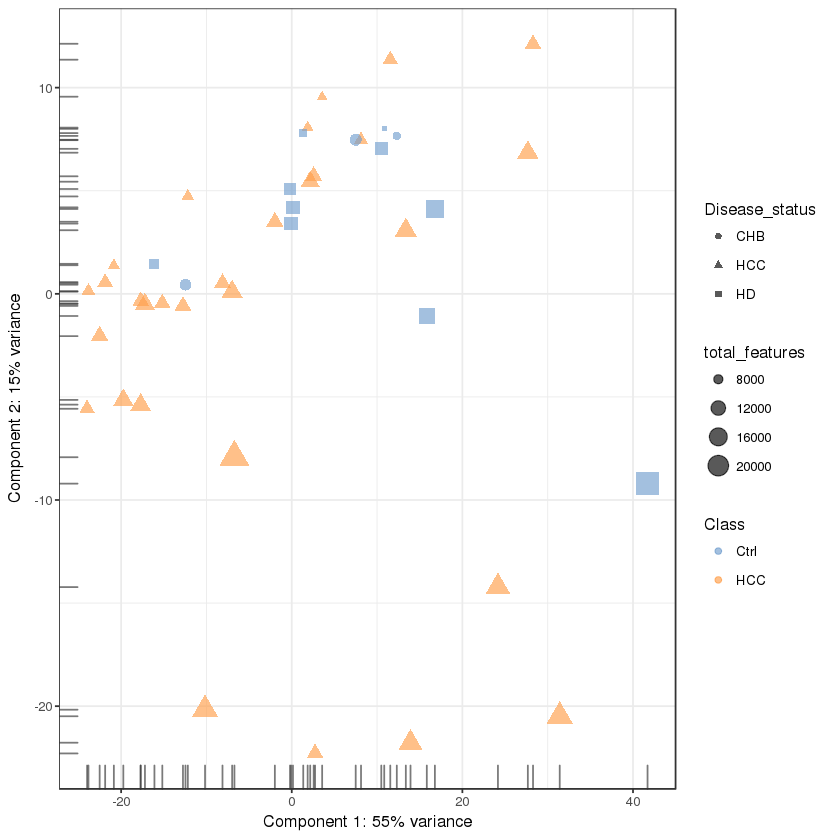

In [36]:
plotPCA(
    reads.qc[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Class",
    shape_by = "Disease_status",
    size_by = "total_features"
)

## imputation

In [37]:
suppressMessages(library("scImpute"))
reads.qc <- readRDS("new_feature/feature_3.rds")
sampleLables <- c()
for(i in colnames(reads.qc)){tmp <- as.character(wholeanno[which(wholeanno$Sample_ID==i),"Class"]); sampleLables <- c(sampleLables,tmp)}

In [41]:
scimpute(count_path = "new_feature/feature_3.rds.csv", infile = "csv", 
         outfile = "txt", out_dir = "new_feature/imputation/", Kcluster = 5, ncores = 2, labels = as.vector(sampleLables), labeled = TRUE)

[1] "reading in raw count matrix ..."
[1] "number of genes in raw count matrix 21747"
[1] "number of cells in raw count matrix 43"
[1] "estimating dropout probability for type 1 ..."
[1] "imputing dropout values for type 1 ..."
[1] "estimating dropout probability for type 2 ..."
[1] "imputing dropout values for type 2 ..."
[1] "writing imputed count matrix ..."


integer(0)

In [42]:
res.qc <- read.table("new_feature/imputation/scimpute_count.txt")
reads.qc.impute <- SingleCellExperiment(assays = list(counts = as.matrix(res.qc)), colData = colData(reads.qc))
reads.qc.impute <- calculateQCMetrics(reads.qc.impute)

In [43]:
assay(reads.qc.impute, "logcounts_raw") <- log2(counts(reads.qc.impute) + 1)

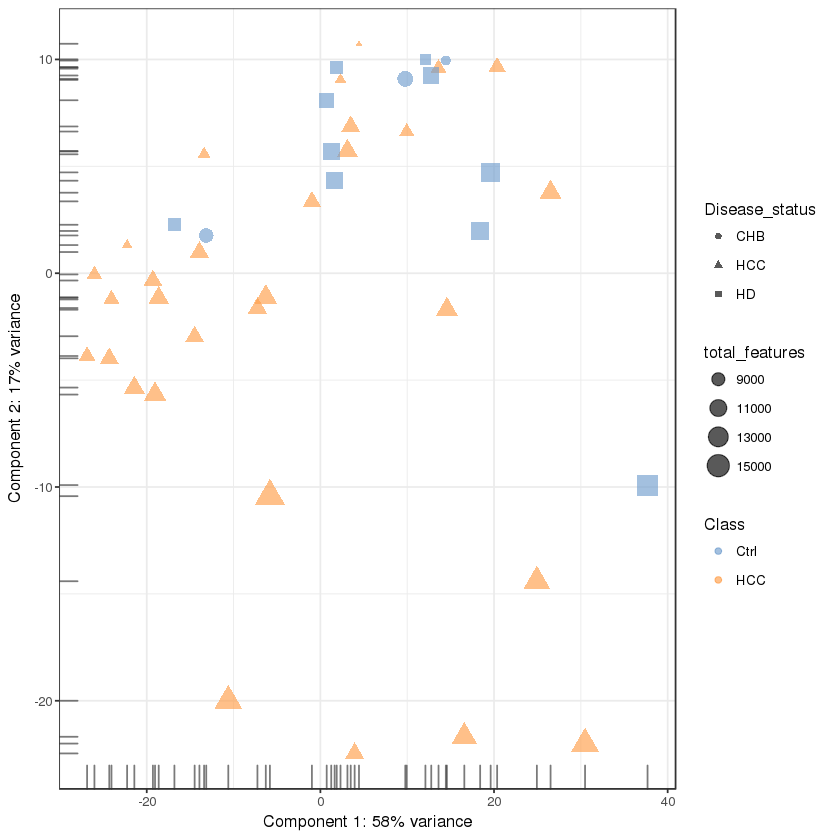

In [44]:
plotPCA(
    reads.qc.impute[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Class",
    shape_by = "Disease_status",
    size_by = "total_features"
)

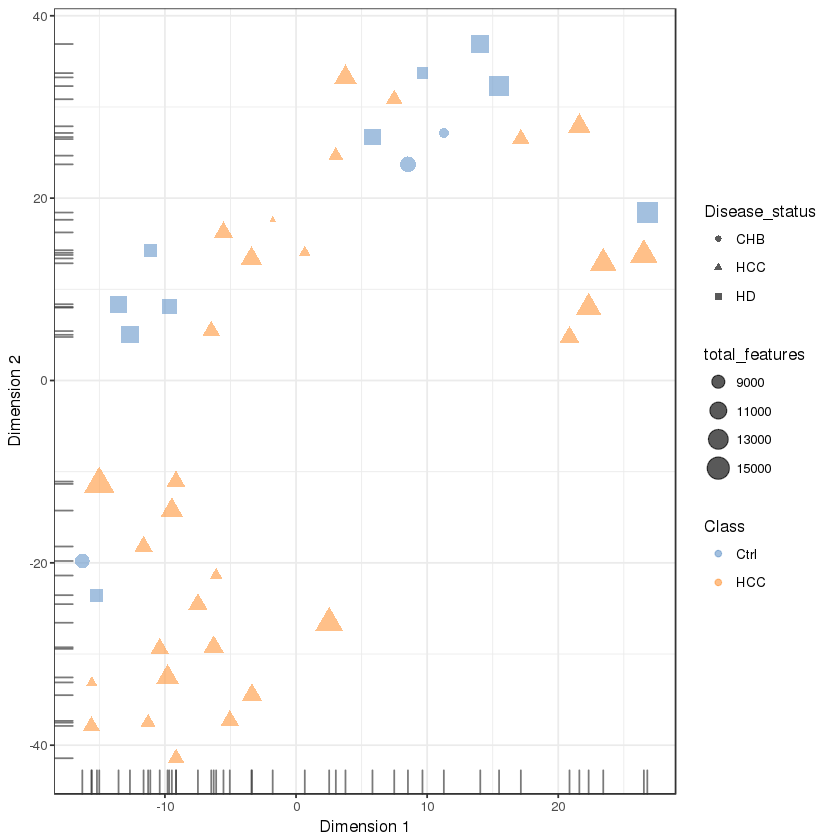

In [45]:
plotTSNE(
    reads.qc.impute[endog_genes, ],
    exprs_values = "logcounts_raw",
    perplexity = 8,
    colour_by = "Class",
    shape_by = "Disease_status",
    size_by = "total_features",
    rand_seed = 123456,
    ntop = 300
)

In [55]:
head(counts(reads.qc.impute))
saveRDS(counts(reads.qc.impute), file = "new_feature/imputation/feature_3_imputationresults.rds")

,lulab_249136_B,lulab_385247_B,lulab_423976_B,lulab_497411_B,lulab_497497_B,lulab_498127_B,lulab_498187_B,lulab_498221_B,lulab_507450_B,lulab_507468_B,⋯,lulab_Normal_2,lulab_Normal_3,lulab_Normal_4,lulab_Normal_5,lulab_Normal_6,lulab_Normal_7,lulab_Normal_8,lulab_HBV_1,lulab_HBV_2,lulab_HBV_3
miRNA_ENSG00000278267.1,6,25,3,9,10,1,9,8,16,2,⋯,8,11,0.00,21,12,18,5,12,2,4
miRNA_ENSG00000284332.1,0,1,0,0,1,0,0,0,0,0,⋯,0,1,0.00,0,0,0,0,0,0,0
miRNA_ENSG00000273874.1,2,21,5,16,13,4,5,6,13,2,⋯,9,4,0.00,20,10,16,6,13,7,1
miRNA_ENSG00000278791.1,14,10,13,12,27,12,23,2,87,8,⋯,24,152,171.00,36,14,2,8,7,9,11
miRNA_ENSG00000207730.3,13980,704,1986,3382,564,430,2031,664,1031,1295,⋯,1422,1121,425.36,256,2310,1748,2501,1355,708,781
miRNA_ENSG00000207607.3,13504,617,1598,3637,760,666,3214,831,1086,1832,⋯,1527,2280,520.47,224,2128,1924,1419,1946,448,639


**********************
## normalization

In [47]:
reads.qc.impute
#counts logcounts_raw 是取log2的

class: SingleCellExperiment 
dim: 21747 43 
metadata(0):
assays(2): counts logcounts_raw
rownames(21747): miRNA_ENSG00000278267.1 miRNA_ENSG00000284332.1 ...
  lncRNA_ENSG00000228786.5 lncRNA_ENSG00000231141.1
rowData names(8): is_feature_control mean_counts ... total_counts
  log10_total_counts
colnames(43): lulab_249136_B lulab_385247_B ... lulab_HBV_2 lulab_HBV_3
colData names(36): X Sample_ID ... pct_counts_top_500_features
  is_cell_control
reducedDimNames(0):
spikeNames(0):

In [48]:
# CPM
logcounts(reads.qc.impute) <- log2(calculateCPM(reads.qc.impute, use.size.factors = FALSE) + 1)

In [49]:
# scran (CPM)
library(scran)
# define cluster for each sample
sampleLables <- c()
for(i in colnames(reads.qc.impute)){tmp <- as.character(wholeanno[which(wholeanno$Sample_ID==i),"Class"]); sampleLables <- c(sampleLables,tmp)}

# sampleLables <- quickCluster(reads.qc.impute, min.size = 10)
sampleLables <- replace(sampleLables, which(sampleLables=="HCC"),1)
sampleLables <- replace(sampleLables, which(sampleLables=="Ctrl"),2)
sampleLables <- as.numeric(sampleLables)
reads.qc.impute <- computeSumFactors(reads.qc.impute, sizes = 5, clusters = sampleLables)
reads.qc.impute <- normalize(reads.qc.impute)

Loading required package: BiocParallel


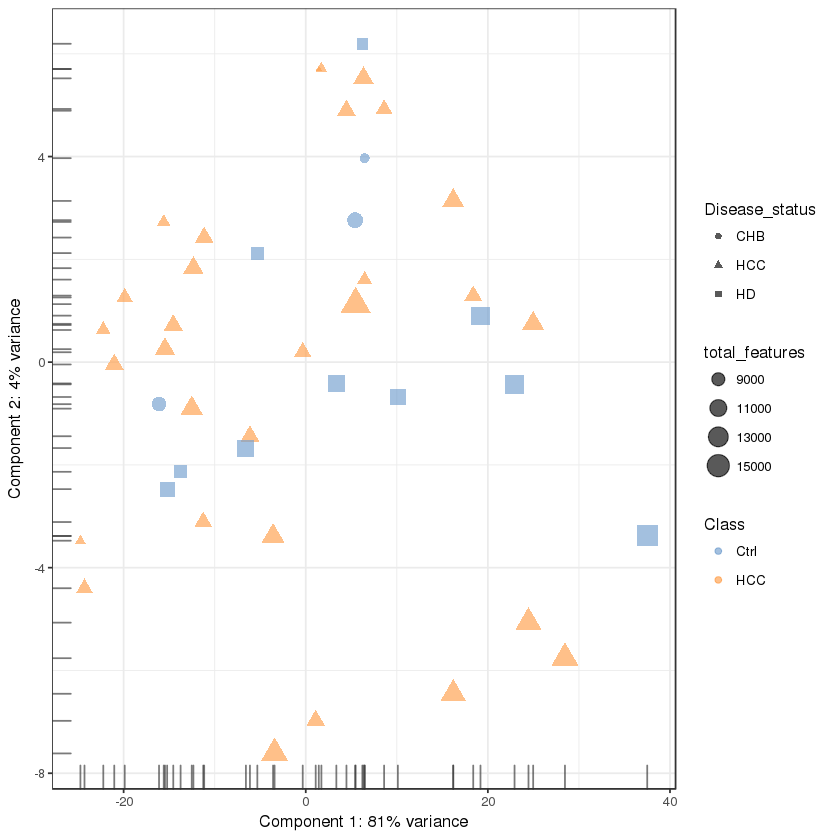

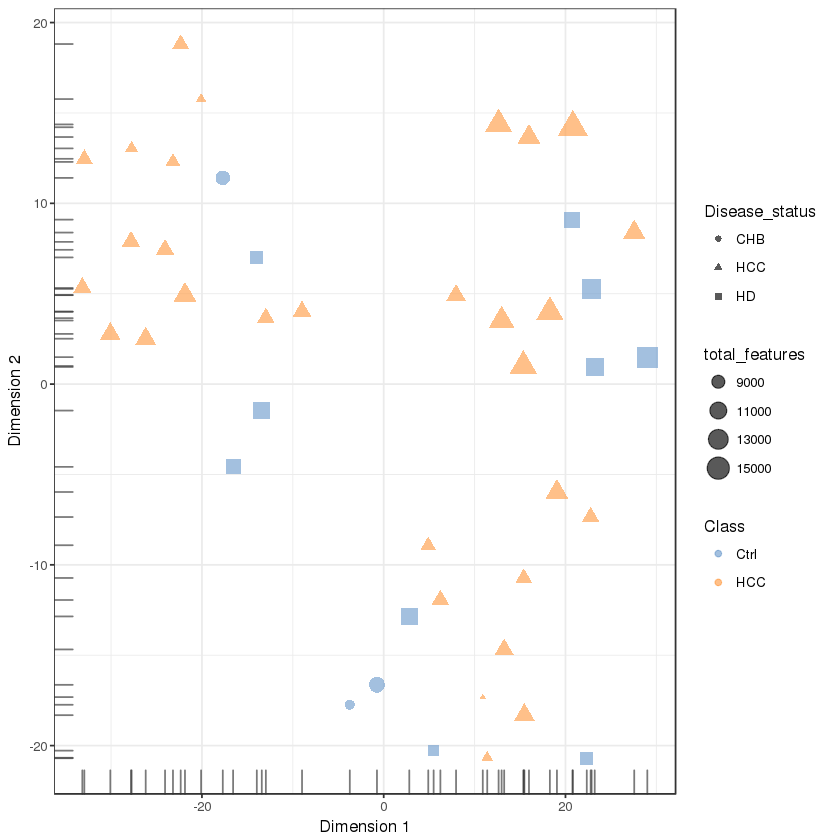

In [51]:
plotPCA(
    reads.qc.impute,
    exprs_values = "logcounts",
    colour_by = "Class",
    shape_by = "Disease_status",
    size_by = "total_features",
    ntop = 300
)

plotTSNE(
    reads.qc.impute,
    exprs_values = "logcounts",
    check_duplicates = FALSE,
    perplexity = 8,
    colour_by = "Class",
    shape_by = "Disease_status",
    size_by = "total_features",
    rand_seed = 123456,
    ntop = 1000
)

### save data after normalization

In [53]:
write.csv(raw_mx[which(rownames(raw_mx) %in% top20name),seq(1,64)[wholeanno$use ==1]  ],'new_feature/top20/feature3_top20.csv')

In [54]:
inputF1 <- t(assay(reads.qc.impute, i="logcounts"))
write.csv(data.frame(sampleID = rownames(inputF1), lables = sampleLables, inputF1),'new_feature/preprocessed/preprocessed_featur3.csv')
